In [2]:
import pandas as pd     
import re
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [1]:
import requests
from bs4 import BeautifulSoup
mport pandas as pd
from openpyxl import Workbook

# Base URL and page number (modify page number as needed)
base_url = 'https://markets.businessinsider.com/news/tsla?p=1'  # Change page number here

# Create a new workbook and worksheet
wb = Workbook()
ws = wb.active

# Define column headers for the Excel file
ws.append(['Headline', 'Date', 'Time'])  # Add header row

# Fetch the webpage
webpage = requests.get(base_url).text

# Parse the HTML content
soup = BeautifulSoup(webpage, 'lxml')

# Extract news data from this page
page_data = []
for story in soup.find_all('div', class_='latest-news__story'):
  # Extract headline
  anchor = story.find('a', class_='news-link')
  if anchor:
    news_title = anchor.text.strip()

  # Extract date and time
  datetime_element = story.find('time', class_='latest-news__date')
  if datetime_element:
    # Extract only full datetime string
    full_datetime = datetime_element.get('datetime')

  # Add data to list (check if all elements exist before appending)
  if news_title and full_datetime:
    page_data.append({'headline': news_title, 'date': full_datetime.split()[0], 'time': full_datetime.split()[1]})

# Convert data to pandas DataFrame (optional)
# df = pd.DataFrame(page_data)

# Add data from this page to the Excel sheet
for item in page_data:
  ws.append([item['headline'], item['date'], item['time']])

# Save the workbook as an Excel file
wb.save('business_insider_news_single_page.xlsx')  # Change filename as needed

print("Data saved to business_insider_news_single_page.xlsx")

Data saved to business_insider_news_single_page.xlsx


In [2]:
import os

# Print the current working directory
print(os.getcwd())

C:\Users\itsme


In [20]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from openpyxl import load_workbook

# Base URL
base_url = 'https://markets.businessinsider.com/news/tsla?p='

# Existing Excel file path (modify if needed)
excel_file = 'C:/Users/itsme/tesla10.xlsx'

# Open the existing workbook (assuming it has headers)
wb = load_workbook(filename=excel_file)
ws = wb.active  # Select the active worksheet (assuming data is in the first sheet)

# Starting page number (assuming previous data covers pages 1 to 10)
start_page = 1

# Loop through 20 pages (starting from page 11)
for page_number in range(start_page, start_page + 450):
  # Construct the current page URL
  url = base_url + str(page_number)

  # Fetch the webpage
  webpage = requests.get(url).text

  # Check if content is empty (may indicate last page)
  if not webpage:
    break  # Stop iterating if no content found (potential last page)

  # Parse the HTML content
  soup = BeautifulSoup(webpage, 'lxml')

  # Extract news data from this page
  page_data = []
  for story in soup.find_all('div', class_='latest-news__story'):
    # Extract headline
    anchor = story.find('a', class_='news-link')
    if anchor:
      news_title = anchor.text.strip()

    # Extract date and time
    datetime_element = story.find('time', class_='latest-news__date')
    if datetime_element:
      # Extract only full datetime string
      full_datetime = datetime_element.get('datetime')

    # Add data to list (check if all elements exist before appending)
    if news_title and full_datetime:
      page_data.append({'headline': news_title, 'date': full_datetime.split()[0], 'time': full_datetime.split()[1]})

  # Add data from this page to the Excel sheet
  for item in page_data:
    ws.append([item['headline'], item['date'], item['time']])

# Save the updated workbook to the existing file
wb.save(excel_file)

print(f"Data appended to {excel_file}")


Data appended to C:/Users/itsme/tesla10.xlsx


In [22]:
import yfinance as yf

In [23]:
tick ="TSLA"
yf.download(tick, start="2014-4-25", end="2024-6-15")


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-04-25,13.466667,13.780000,13.176667,13.323333,13.323333,104950500
2014-04-28,13.333333,13.586000,12.700000,13.234000,13.234000,105630000
2014-04-29,13.214000,13.810000,13.035333,13.794667,13.794667,86686500
2014-04-30,13.573333,13.877333,13.418667,13.859333,13.859333,66609000
2014-05-01,13.805333,14.268000,13.712667,13.848667,13.848667,81598500
...,...,...,...,...,...,...
2024-06-10,176.059998,178.570007,173.169998,173.789993,173.789993,50869700
2024-06-11,173.919998,174.750000,167.410004,170.660004,170.660004,64761900
2024-06-12,171.119995,180.550003,169.800003,177.289993,177.289993,90389400


In [35]:
import yfinance as yf                     #getting finance data
import pandas as pd

# Define the stock ticker and the date range 
ticker = 'TSLA'
start_date = "2014-4-25"
end_date = "2024-6-15"

# Fetch the data from Yahoo Finance
stock_data = yf.download(ticker, start=start_date, end=end_date)
stock_data.index = stock_data.index.strftime('%d-%m-%Y')
# Create a new Excel writer object and save the data
excel_file = 'stock_data1.xlsx'
stock_data.to_excel(excel_file)

print(f"Data for {ticker} from {start_date} to {end_date} has been saved to {excel_file}")

[*********************100%%**********************]  1 of 1 completed


Data for TSLA from 2014-4-25 to 2024-6-15 has been saved to stock_data1.xlsx


In [36]:
import pandas as pd                             #Reversing file

# Load the Excel file
input_file = 'tesla10.xlsx'  # Replace with your actual file name
output_file = 'reversed_tesla10.xlsx'   # Output file name

# Load the data from the first sheet of the Excel file
df = pd.read_excel(input_file)

# Reverse the order of the DataFrame
reversed_df = df.iloc[::-1].reset_index(drop=True)

# Save the reversed DataFrame to a new Excel file
reversed_df.to_excel(output_file, index=False)

# Display a message indicating completion
print(f"Data has been reversed and saved to '{output_file}'")

Data has been reversed and saved to 'reversed_tesla10.xlsx'


In [40]:
# Import necessary libraries            #changing date format
import pandas as pd

# Load the Excel file
file_path = 'reversed_tesla10.xlsx'  # Replace with your actual file name

# Load the data from the Excel file
df = pd.read_excel(file_path)

# Assuming the date column is named 'Date', if not, replace 'Date' with the actual column name
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert to datetime, handle errors if any
df['Date'] = df['Date'].dt.strftime('%d-%m-%Y')  # Format date to 'dd-mm-yyyy'

# Save the DataFrame with the formatted date to the same Excel file
df.to_excel(file_path, index=False)

# Display a message indicating completion
print(f"Dates have been formatted and saved to '{file_path}'")


Dates have been formatted and saved to 'reversed_tesla10.xlsx'


In [41]:
# Import necessary libraries          # Merging
import pandas as pd

# Load the news and stock data from Excel files
news_file = 'reversed_tesla10.xlsx'  # Replace with your actual file name
stock_file = 'stock_data1.xlsx'  # Replace with your actual file name

# Assuming the first sheet is the relevant one, else specify the sheet name or index
news_df = pd.read_excel(news_file)
stock_df = pd.read_excel(stock_file)

# Ensure the date columns are in datetime format
news_df['Date'] = pd.to_datetime(news_df['Date'], format='%d-%m-%Y')
stock_df['Date'] = pd.to_datetime(stock_df['Date'], format='%d-%m-%Y')

# Merge the dataframes by repeating stock data for each news entry on the same date
merged_df = pd.merge(news_df, stock_df, on='Date', how='left')

# Save the merged dataframe to a new Excel file
merged_df.to_excel('merged_news_stock_data.xlsx', index=False)

# Display a message indicating completion
print("Data has been merged and saved to 'merged_news_stock_data.xlsx'")


Data has been merged and saved to 'merged_news_stock_data.xlsx'


In [43]:
# Import necessary libraries            #Removing Holidays
import pandas as pd

# Load the merged Excel file
file_path = 'merged_news_stock_data.xlsx'  # Replace with your actual file name

# Load the data from the Excel file
df = pd.read_excel(file_path)

# Check which columns are empty from column C onwards
columns_to_check = df.columns[2:]  # Columns from C onwards (0-indexed, so column C is index 2)

# Drop rows where all specified columns are NaN (missing)
df_cleaned = df.dropna(subset=columns_to_check, how='all')

# Save the cleaned DataFrame to the same Excel file
df_cleaned.to_excel(file_path, index=False)

# Display a message indicating completion
print(f"Rows with no data from column C onwards have been deleted and saved to '{file_path}'")


Rows with no data from column C onwards have been deleted and saved to 'merged_news_stock_data.xlsx'


In [54]:
import pandas as pd

# Load the Excel file
file_path = 'merged_news_stock_data.xlsx'  # Replace with your actual file name

# Load the data from the Excel file
df = pd.read_excel(file_path)

# Assuming the date column is named 'Date', if not, replace 'Date' with the actual column name
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')  # Convert to datetime, handle errors if any
df['Date'] = df['Date'].dt.strftime('%d-%m-%Y')  # Format date to 'dd-mm-yyyy'

# Save the DataFrame with the formatted date to the same Excel file
df.to_excel(file_path, index=False)

# Display a message indicating completion
print(f"Dates have been formatted and saved to '{file_path}'")

Dates have been formatted and saved to 'merged_news_stock_data.xlsx'


In [53]:
# Import necessary libraries               ##Creating label
import pandas as pd

# Load the merged Excel file
file_path = 'merged_news_stock_data.xlsx'  # Replace with your actual file name

# Load the data from the Excel file
df = pd.read_excel(file_path)

# Ensure the Date column is in datetime format and sorted
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df = df.sort_values(by='Date').reset_index(drop=True)

# Create the Label column
df['Label'] = 1  # Initialize the column with 1s

# Iterate over the DataFrame and calculate the Label
for i in range(1, len(df)):
    if df.at[i, 'Date'] == df.at[i-1, 'Date']:
        df.at[i, 'Label'] = df.at[i-1, 'Label']
    else:
        closing_difference = df.at[i, 'Close'] - df.at[i-1, 'Close']
        df.at[i, 'Label'] = 1 if closing_difference > 0 else 0

# Save the DataFrame with the new Label column back to the same Excel file
df.to_excel(file_path, index=False)

# Display a message indicating completion
print(f"Label column has been added and saved to '{file_path}'")


Label column has been added and saved to 'merged_news_stock_data.xlsx'


In [29]:
%pip install enchant

Note: you may need to restart the kernel to use updated packages.


In [48]:
                                        # Replacing non alphabetics with space and lowering case
import re
import pandas as pd

# Load the Excel file
file_path = 'train3.xlsx'
df = pd.read_excel(file_path)

# Function to clean text
def clean_text(text):
  """
  This function cleans text by:
    - Removing all digits.
    - Removing non-alphanumeric characters (except space and underscore).
    - Converting text to lowercase.
  """
  # Remove digits
  text = re.sub(r"\d", "", text)  # Remove digits
  # Remove non-alphanumeric characters (except space and underscore)
  text = re.sub(r"[^\w\s_]", "", text)
  # Convert to lowercase
  text = text.lower()
  return text

# Clean the 'Headline' column
df['Headline'] = df['Headline'].apply(clean_text)

# Save the updated DataFrame to the same Excel file
df.to_excel(file_path, index=False)

# Display completion message
print(f"Headline column cleaned and saved to '{file_path}'.")


Headline column cleaned and saved to 'train3.xlsx'.


In [50]:
                                       # Arranging according to date
file_path =  'train3.xlsx'   

# Load the data from the Excel file
df = pd.read_excel(file_path)

# Ensure the date column is of datetime type
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Sort the DataFrame by the date column in ascending order
df_sorted = df.sort_values(by='Date')

# Save the sorted DataFrame back to the same Excel file
df_sorted.to_excel(file_path, index=False)

# Display a message indicating completion
print(f"Data has been sorted by the date column and saved to '{file_path}'")

Data has been sorted by the date column and saved to 'train3.xlsx'


In [80]:
                                                 #Clubbing same date news in a string

output_file_path = 'training2_data.xlsx'  # The new file name


# Group by 'Date', concatenate headlines, and retain a unique label
grouped_df = df.groupby('Date').agg({
    'Headline': lambda x: ' '.join(x),
    'Label': 'first'
}).reset_index()

# Save the updated DataFrame to a new Excel file
grouped_df.to_excel(output_file_path, index=False)

# Display a message indicating completion
print(f"Headlines have been grouped by date and saved to '{output_file_path}'")

Headlines have been grouped by date and saved to 'training2_data.xlsx'


In [1]:
                                   # Creating train and test dataframe

file_path = 'train3.xlsx' # Replace with your actual file name

# Load the data from the Excel file
df = pd.read_excel(file_path)

# Features (text data)
X = df['Headline']

# Labels (assuming 'Category' column holds category labels)
y = df['Label']

# Split data into train and test sets (test_size=0.2 means 20% for test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print confirmation message (optional)
print(f"Train data shapes: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test data shapes: X_test: {X_test.shape}, y_test: {y_test.shape}")

NameError: name 'pd' is not defined

In [130]:
                                 # Implementing Bagg of words and RandomForest Classifier for training Model
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

# Initialize CountVectorizer with specified ngram_range
vectorizer = CountVectorizer(ngram_range=(2, 2))

# Fit and transform the Headline column of the training data
X_train = vectorizer.fit_transform(X_train)


# Initialize RandomForestClassifier with specified parameters
model = RandomForestClassifier(n_estimators=200, criterion='entropy')

# Train the model
model.fit(X_train, y_train)

# Display a message indicating completion
print("Model has been trained successfully.")


Model has been trained successfully.


In [131]:
                                                                            # Testing the RandomForest

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Transform the Headline column of the testing data
X_test = vectorizer.transform(X_test)


# Make predictions on the testing data
predictions = model.predict(X_test)

# Calculate and print the confusion matrix
matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(matrix)

# Calculate and print the accuracy score
score = accuracy_score(y_test, predictions)
print("\nAccuracy Score:")
print(score)

# Calculate and print the classification report
report = classification_report(y_test, predictions)
print("\nClassification Report:")
print(report)


Confusion Matrix:
[[ 891 1281]
 [ 648 1653]]

Accuracy Score:
0.5687458081824279

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.41      0.48      2172
           1       0.56      0.72      0.63      2301

    accuracy                           0.57      4473
   macro avg       0.57      0.56      0.56      4473
weighted avg       0.57      0.57      0.56      4473



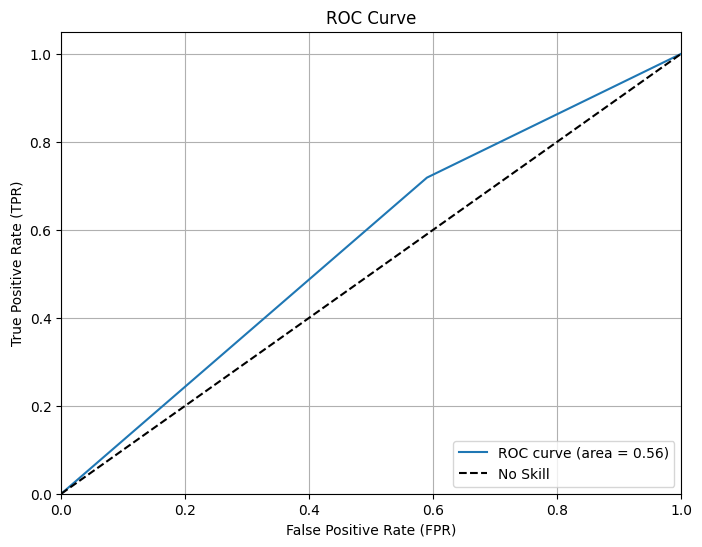

In [132]:
                                                              #ROC Curve             

from sklearn.metrics import roc_curve, auc

# Replace with your actual data
y_true = y_test
y_pred = predictions

# Calculate false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Import libraries for plotting (optional)
import matplotlib.pyplot as plt

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [133]:
                                   # Creating train and test dataframe

file_path = 'train3.xlsx' # Replace with your actual file name

# Load the data from the Excel file
df = pd.read_excel(file_path)

# Features (text data)
X = df['Headline']

# Labels (assuming 'Category' column holds category labels)
y = df['Label']

# Split data into train and test sets (test_size=0.2 means 20% for test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print confirmation message (optional)
print(f"Train data shapes: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test data shapes: X_test: {X_test.shape}, y_test: {y_test.shape}")

Train data shapes: X_train: (17890,), y_train: (17890,)
Test data shapes: X_test: (4473,), y_test: (4473,)


In [134]:
                                                            # Training using NAive bias

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report




# Initialize CountVectorizer with specified ngram_range
vectorizer = CountVectorizer(ngram_range=(2, 2))

# Split the training data into training and validation sets
X_train_texts, X_val_texts, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

# Fit and transform the training data, and transform the validation data
X_train = vectorizer.fit_transform(X_train_texts)
X_val = vectorizer.transform(X_val_texts)

# Initialize MultinomialNB
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model on the training set
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Print detailed classification report for training and validation sets
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))



# Transform the Headline column of the testing data
X_test = vectorizer.transform(X_test)



# Make predictions on the testing data
predictions = model.predict(X_test)

# Calculate and print the confusion matrix for the test sety_test
matrix = confusion_matrix(y_test, predictions)
print("\nConfusion Matrix:")
print(matrix)

# Calculate and print the accuracy score for the test set
score = accuracy_score(y_test, predictions)
print("\nAccuracy Score:")
print(score)

# Calculate and print the classification report for the test set
report = classification_report(y_test, predictions)
print("\nClassification Report:")
print(report)


Training Accuracy: 0.96
Validation Accuracy: 0.55
Training Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      7132
           1       0.96      0.97      0.97      7180

    accuracy                           0.96     14312
   macro avg       0.96      0.96      0.96     14312
weighted avg       0.96      0.96      0.96     14312

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.53      0.54      1776
           1       0.56      0.58      0.57      1802

    accuracy                           0.55      3578
   macro avg       0.55      0.55      0.55      3578
weighted avg       0.55      0.55      0.55      3578


Confusion Matrix:
[[1217  955]
 [ 920 1381]]

Accuracy Score:
0.5808182427900738

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.56      0.56      2172
           1   

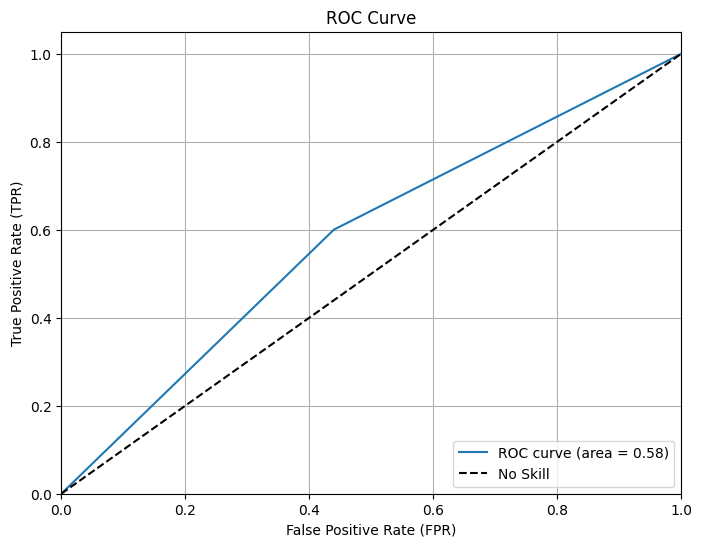

In [135]:
                                                              #ROC Curve             

from sklearn.metrics import roc_curve, auc

# Replace with your actual data
y_true = y_test
y_pred = predictions

# Calculate false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Import libraries for plotting (optional)
import matplotlib.pyplot as plt

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [136]:
                                   # Creating train and test dataframe

file_path = 'train3.xlsx' # Replace with your actual file name

# Load the data from the Excel file
df = pd.read_excel(file_path)

# Features (text data)
X = df['Headline']

# Labels (assuming 'Category' column holds category labels)
y = df['Label']

# Split data into train and test sets (test_size=0.2 means 20% for test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print confirmation message (optional)
print(f"Train data shapes: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test data shapes: X_test: {X_test.shape}, y_test: {y_test.shape}")

Train data shapes: X_train: (17890,), y_train: (17890,)
Test data shapes: X_test: (4473,), y_test: (4473,)


In [137]:
                                       #implementing TF-idf and random forest with stemming

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK data files (only needed once)
nltk.download('punkt')

# Example dataframe with Headline and Label columns




# Initialize the stemmer
stemmer = PorterStemmer()

# Function to stem the text
def stem_text(text):
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Apply stemming to the Headline column
X_train = X_train.apply(stem_text)

# Initialize TfidfVectorizer with specified ngram_range and max features
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=500)

# Split the data into training and validation sets
X_train_texts, X_val_texts, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)

# Fit and transform the training data, and transform the validation data
X_train = vectorizer.fit_transform(X_train_texts)
X_val = vectorizer.transform(X_val_texts)

# Initialize RandomForestClassifier with GridSearchCV for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

# Use StratifiedKFold to handle small datasets
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=param_grid,
                           cv=cv,
                           n_jobs=-1,
                           scoring='accuracy')

# Train the model with GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Use the best estimator to predict
best_model = grid_search.best_estimator_

# Evaluate the model on the training set
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Evaluate the model on the validation set
y_val_pred = best_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Print detailed classification report
print("Training Classification Report:")
print(classification_report(y_train, y_train_pred))
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Check for overfitting
if train_accuracy > val_accuracy:
    print("The model might be overfitting.")
else:
    print("The model does not appear to be overfitting.")




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\itsme\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training Accuracy: 0.98
Validation Accuracy: 0.56
Training Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7132
           1       0.98      0.98      0.98      7180

    accuracy                           0.98     14312
   macro avg       0.98      0.98      0.98     14312
weighted avg       0.98      0.98      0.98     14312

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.56      0.56      1776
           1       0.56      0.55      0.56      1802

    accuracy                           0.56      3578
   macro avg       0.56      0.56      0.56      3578
weighted avg       0.56      0.56      0.56      3578

The model might be overfitting.


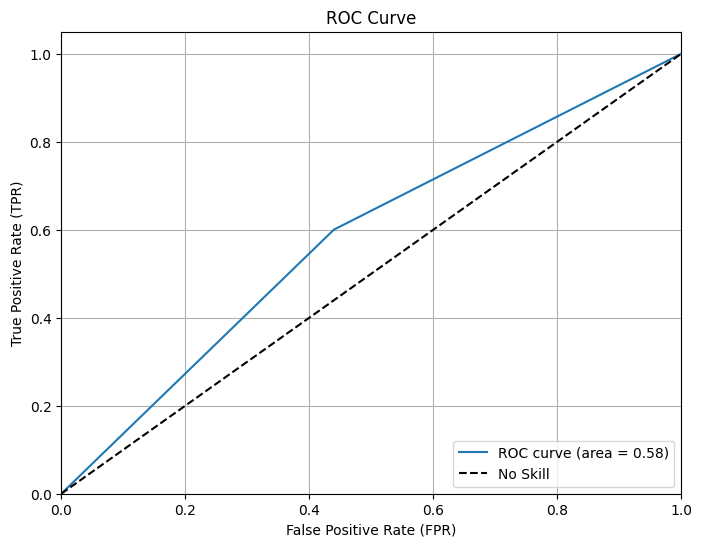

In [138]:
                                                              #ROC Curve             

from sklearn.metrics import roc_curve, auc

# Replace with your actual data
y_true = y_test
y_pred = predictions

# Calculate false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Import libraries for plotting (optional)
import matplotlib.pyplot as plt

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


#Using RNN

In [8]:
                                   # Creating train and test dataframe

file_path = 'train3.xlsx' # Replace with your actual file name

# Load the data from the Excel file
df = pd.read_excel(file_path)

# Features (text data)
X = df['Headline']

# Labels (assuming 'Category' column holds category labels)
y = df['Label']

# Split data into train and test sets (test_size=0.2 means 20% for test data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print confirmation message (optional)
print(f"Train data shapes: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test data shapes: X_test: {X_test.shape}, y_test: {y_test.shape}")

Train data shapes: X_train: (17890,), y_train: (17890,)
Test data shapes: X_test: (4473,), y_test: (4473,)


In [9]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from numpy import array
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer

# Download NLTK stopwords


In [10]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [11]:
tokenizer = Tokenizer(num_words = 5000)

tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

AttributeError: 'int' object has no attribute 'lower'

In [150]:
vocab_size = len(tokenizer.word_index) + 1

max_len = 200

X_train = pad_sequences(X_train, padding = 'post', maxlen = max_len)
X_test = pad_sequences(X_test , padding = 'post', maxlen = max_len)

In [151]:
embeddings_dictionary = dict()
glove_file = open('a2_glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [152]:
embedding_matrix = np.zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [153]:
model = Sequential([
    Embedding(vocab_size, 100,  weights=[embedding_matrix], input_length=max_len, trainable=False),
    LSTM(128),
    Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

C:\Users\itsme\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [154]:

history = model.fit(X_train, y_train, batch_size = 128, epochs = 6, validation_split = 0.20, verbose = 1)


Epoch 1/6
112/112 ━━━━━━━━━━━━━━━━━━━━ 23s 191ms/step - accuracy: 0.5037 - loss: 0.6933 - val_accuracy: 0.4964 - val_loss: 0.6932
Epoch 2/6
112/112 ━━━━━━━━━━━━━━━━━━━━ 22s 193ms/step - accuracy: 0.4964 - loss: 0.6933 - val_accuracy: 0.4964 - val_loss: 0.6932
Epoch 3/6
112/112 ━━━━━━━━━━━━━━━━━━━━ 22s 194ms/step - accuracy: 0.5006 - loss: 0.6932 - val_accuracy: 0.5036 - val_loss: 0.6931
Epoch 4/6
112/112 ━━━━━━━━━━━━━━━━━━━━ 22s 194ms/step - accuracy: 0.4982 - loss: 0.6931 - val_accuracy: 0.5036 - val_loss: 0.6931
Epoch 5/6
112/112 ━━━━━━━━━━━━━━━━━━━━ 21s 191ms/step - accuracy: 0.5046 - loss: 0.6931 - val_accuracy: 0.5036 - val_loss: 0.6931
Epoch 6/6
112/112 ━━━━━━━━━━━━━━━━━━━━ 22s 193ms/step - accuracy: 0.5013 - loss: 0.6932 - val_accuracy: 0.5036 - val_loss: 0.6931


In [158]:
score = model.evaluate(X_test, y_test, verbose = 1)
predictions = model.predict(X_test)


140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.5279 - loss: 0.6930
140/140 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step


In [3]:
print(predictions)


NameError: name 'predictions' is not defined

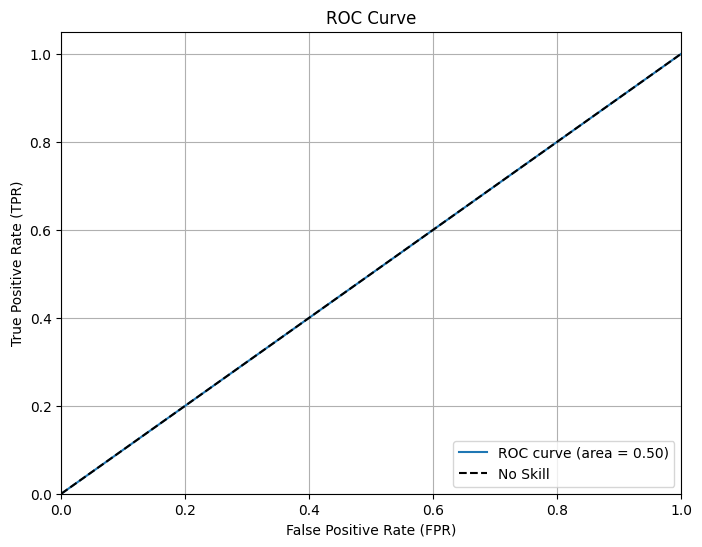

In [159]:
                                                              #ROC Curve             

from sklearn.metrics import roc_curve, auc

# Replace with your actual data
y_true = y_test
y_pred = predictions

# Calculate false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Import libraries for plotting (optional)
import matplotlib.pyplot as plt

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


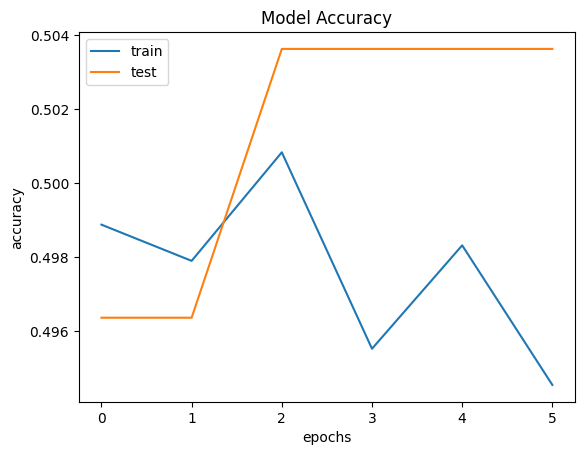

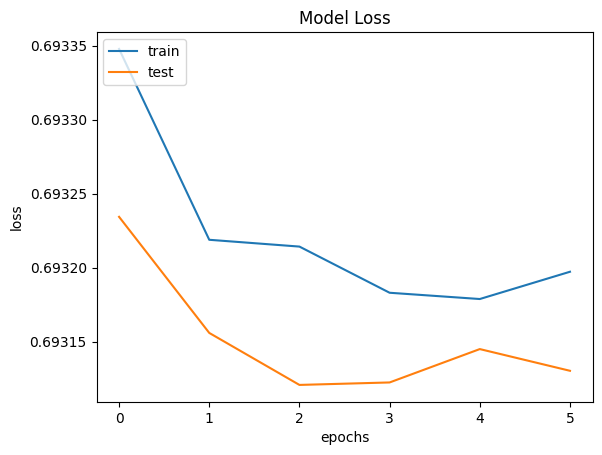

In [156]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train' , 'test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train' , 'test'], loc = 'upper left')
plt.show()

In [178]:
y_test = df['Label'].values


In [182]:
print(len(predictions))
print(len(predictions))

4473
4473


Final Portfolio Value: Rs 1000.00
Total Return: 0.00%


ValueError: x and y must have same first dimension, but have shapes (22363,) and (4470,)

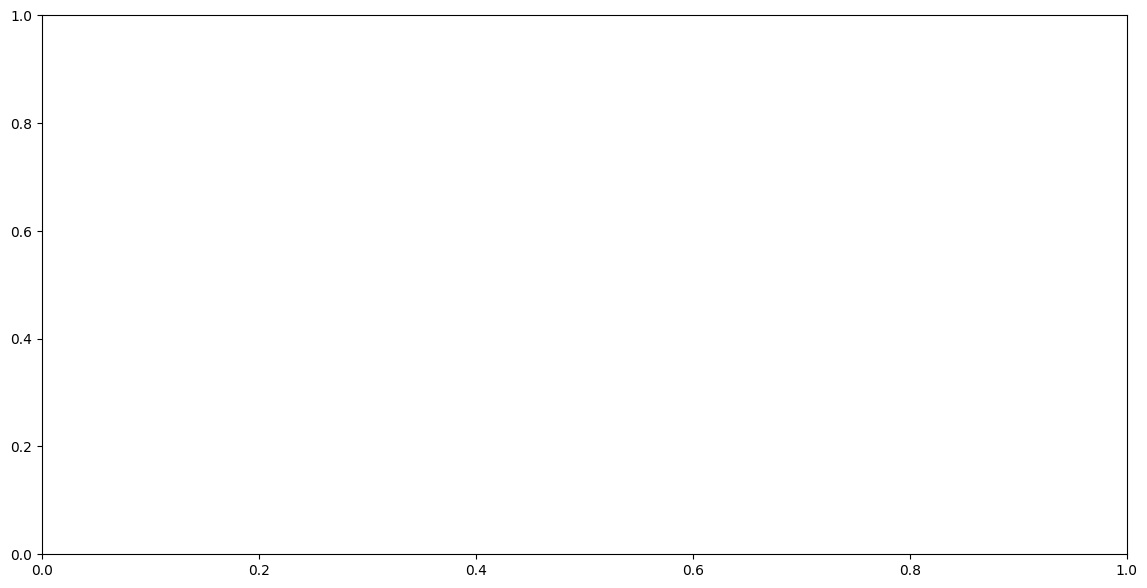

In [185]:
import pandas as pd         
# Define parameters for trading strategy
initial_investment = 1000  # Initial investment amount
buy_increment = 0.05  # Buy increment (5% increase)
sell_decrement = 0.03  # Sell decrement (3% decrease)

# Determine buy/sell points based on predicted labels
buy_points = []
sell_points = []
balance = initial_investment
holdings = 0
portfolio_values = [initial_investment]

for i in range(1, 4470):
    if predictions[i] == 1 and predictions[i-1] == 0:
        # Buy signal
        buy_price = y_test[i]  # Assuming buy at the timestamp
        if balance > 0:
            holdings = balance / buy_price
            balance = 0
            buy_points.append((y_test[i], buy_price))
    elif predictions[i] == 0 and predictions[i-1] == 1:
        # Sell signal
        sell_price = y_test[i]  # Assuming sell at the timestamp
        if holdings > 0:
            balance = holdings * sell_price
            holdings = 0
            sell_points.append((y_test[i], sell_price))
    # Update portfolio value (assuming no change if holding)
    portfolio_values.append(balance + holdings * y_test[i])

# Calculate final portfolio value and returns
final_portfolio_value = portfolio_values[-1]
total_return = (final_portfolio_value - initial_investment) / initial_investment * 100

print(f"Final Portfolio Value: Rs {final_portfolio_value:.2f}")
print(f"Total Return: {total_return:.2f}%")

# Plot portfolio value over time with buy/sell points
plt.figure(figsize=(14, 7))
plt.plot(y_test, portfolio_values, label='Portfolio Value', alpha=0.7)
for date, price in buy_points:
    plt.scatter(date, price, label='Buy Signal', marker='^', color='green')
for date, price in sell_points:
    plt.scatter(date, price, label='Sell Signal', marker='v', color='red')
plt.title('Portfolio Value Over Time with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()

In [187]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train)

X_train = word_tokenizer.texts_to_sequences(X_train)
X_test = word_tokenizer.texts_to_sequences(X_test)

In [87]:
import pandas as pd

# Load the Excel file


# Find the maximum length of strings in the 'Headline' column
max_length = df['Headline'].str.len().max()

# Print the maximum length
print(f"Maximum length of strings in 'Headline' column: {max_length}")

Maximum length of strings in 'Headline' column: 196


In [88]:
import io
import json
# Saving
tokenizer_json = word_tokenizer.to_json()
with io.open('b3_tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))
# Adding 1 to store dimensions for words for which no pretrained word embeddings exist

vocab_length = len(word_tokenizer.word_index) + 1

vocab_length
92394
# Padding all reviews to fixed length 100

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
# Load GloVe word embeddings and create an Embeddings Dictionary

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('a2_glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

# Create Embedding Matrix having 100 columns 
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
embedding_matrix.shape

(14095, 100)

In [89]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

# Neural Network architecture
lstm_model = Sequential()

# Define the embedding layer
embedding_layer = Embedding(
   input_dim=vocab_length,  # Size of the vocabulary
    output_dim=100,  # Dimension of the dense embedding
    weights=[embedding_matrix],  # Pre-trained word vectors
    #input_length=maxlen,  # Length of input sequences
    trainable=False  # Don't train the embedding layer
)




# Add the embedding layer
lstm_model.add(embedding_layer)

# Add the LSTM layer
lstm_model.add(LSTM(units=128))

# Add the output layer
lstm_model.add(Dense(1, activation='sigmoid'))

# Model compiling
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# Print the model summary
print(lstm_model.summary())


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_24 (Embedding)             │ ?                           │       1,409,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_24 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,409,500 (5.38 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,409,500 (5.38 MB)

None


In [71]:
# Model Training

lstm_model_history = lstm_model.fit(X_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
112/112 ━━━━━━━━━━━━━━━━━━━━ 13s 108ms/step - acc: 0.4984 - loss: 0.6933 - val_acc: 0.5036 - val_loss: 0.6931
Epoch 2/6
112/112 ━━━━━━━━━━━━━━━━━━━━ 12s 106ms/step - acc: 0.5032 - loss: 0.6932 - val_acc: 0.5036 - val_loss: 0.6931
Epoch 3/6
112/112 ━━━━━━━━━━━━━━━━━━━━ 13s 112ms/step - acc: 0.5017 - loss: 0.6932 - val_acc: 0.5036 - val_loss: 0.6931
Epoch 4/6
112/112 ━━━━━━━━━━━━━━━━━━━━ 12s 111ms/step - acc: 0.5018 - loss: 0.6931 - val_acc: 0.5036 - val_loss: 0.6931
Epoch 5/6
112/112 ━━━━━━━━━━━━━━━━━━━━ 12s 107ms/step - acc: 0.5112 - loss: 0.6931 - val_acc: 0.5036 - val_loss: 0.6931
Epoch 6/6
112/112 ━━━━━━━━━━━━━━━━━━━━ 12s 108ms/step - acc: 0.4881 - loss: 0.6932 - val_acc: 0.5036 - val_loss: 0.6931


In [72]:
# Predictions on the Test Set

score = lstm_model.evaluate(X_test, y_test, verbose=1)

140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - acc: 0.5279 - loss: 0.6930


In [73]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.693081259727478
Test Accuracy: 0.5144198536872864


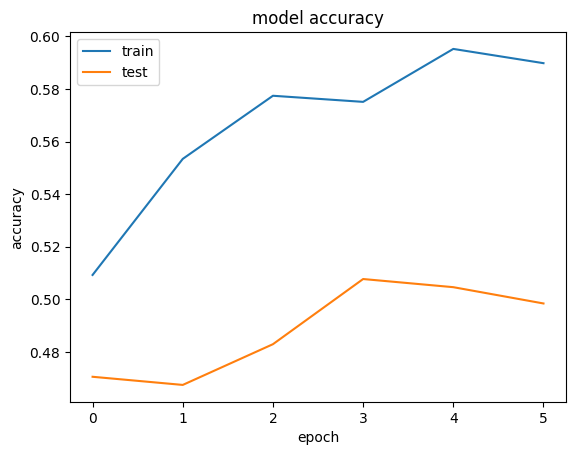

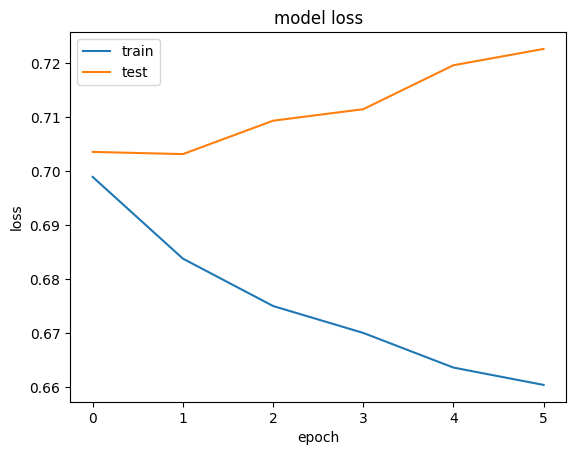

In [35]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(lstm_model_history.history['acc'])
plt.plot(lstm_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()